In [1]:
# Placing all the imports in first cell
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [2]:
# Reading data and investigating columns
## The data has been lazy cleaned due to shear volume of data available
## Actual implemantation will have local database with only required data

cleaned_2016_data = pd.read_csv('files/cleaned/2016.csv')
cleaned_2017_data = pd.read_csv('files/cleaned/2017.csv')
cleaned_2018_data = pd.read_csv('files/cleaned/2018.csv')

filtered_2016_prescriptions = pd.read_csv('files/toplist/prescription/2016.csv')
filtered_2017_prescriptions = pd.read_csv('files/toplist/prescription/2017.csv')
filtered_2018_prescriptions = pd.read_csv('files/toplist/prescription/2018.csv')

filtered_2016_reimbursement = pd.read_csv('files/toplist/refund/2016.csv')
filtered_2017_reimbursement = pd.read_csv('files/toplist/refund/2017.csv')
filtered_2018_reimbursement = pd.read_csv('files/toplist/refund/2018.csv')

In [3]:
# Exploring dataset
def look_at_dataset(dataset):
    print(dataset.head(10))
    print(dataset.info(), "\n")
    print("Dataset Shape: ", dataset.shape, " \n")
    print(dataset.describe , "\n\n ------------------------------------------------ \n\n" )
    
look_at_dataset(cleaned_2016_data)
look_at_dataset(cleaned_2017_data)
look_at_dataset(cleaned_2018_data)

look_at_dataset(filtered_2016_prescriptions)
look_at_dataset(filtered_2017_prescriptions)
look_at_dataset(filtered_2018_prescriptions)

look_at_dataset(filtered_2016_reimbursement)
look_at_dataset(filtered_2017_reimbursement)
look_at_dataset(filtered_2018_reimbursement)

           NDC Product Name  Package Size  Units Reimbursed  \
0  10370025702   1037002570             2          543864.0   
1    409665105   ** FROM CL             5             160.0   
2    116200116   .12% CHLOR            16         1774893.0   
3    264786500    0.15% KCL             0          315035.0   
4    338065604   0.25 ACETI             4          223250.0   
5    264230410   0.25% ACET            10           15300.0   
6    264959410   0.4% LIDOC            10             180.0   
7    264780210   0.45% SODI            10           16206.0   
8    264959820   0.8% LIDOC            20             256.5   
9    338954206    0.9% NACL             6          305758.0   

   Number of Prescriptions  Total Amount Reimbursed  \
0                     8105               1744843.57   
1                       12                     0.12   
2                     3704                 20333.52   
3                      267                  4618.04   
4                      130     

None 

Dataset Shape:  (29, 8)  

<bound method NDFrame.describe of             NDC Product Name  Package Size  Units Reimbursed  \
0   61958190101   GENVOYA TA             1       1541119.000   
1   64406005801   SPINRAZA 1             1          1519.000   
2   50242004062   XOLAIR 150            62         31974.456   
3   51167080901   ORKAMBI 20             1        140224.000   
4   50458057930   XARELTO 20            30       2230014.900   
5      69018921   IBRANCE 12            21         34626.000   
6   67386031321   ONFI 2.5 M            21       2384264.300   
7   63004871001    HP ACTHAR             1          2235.000   
8   62856079701   ALOXI 0.25             1         94868.150   
9   51167070002   ORKAMBI 10             2         89460.000   
10  75987005006   RAVICTI 1.             6         90425.000   
11      3373413   OPDIVO 240            13         84128.800   
12     78065615   JADENU 360            15         90770.000   
13  51167020001   KALYDECO 1        

In [4]:
# learning more about each columns in order to identify suitable model

print("Details on 2016:")
for column in cleaned_2016_data:
    print("{:<40}:unique {:<5} out of {:}".format(column, cleaned_2016_data[column].nunique(), cleaned_2016_data[column].count()))
    
print("\nDetails on 2017")
for column in cleaned_2017_data:
    print("{:<40}:unique {:<5} out of {:}".format(column, cleaned_2017_data[column].nunique(), cleaned_2017_data[column].count()))

print("\nDetails on 2018")
for column in cleaned_2018_data:
    print("{:<40}:unique {:<5} out of {:}".format(column, cleaned_2018_data[column].nunique(), cleaned_2018_data[column].count()))


Details on 2016:
NDC                                     :unique 6473  out of 8386
Product Name                            :unique 8386  out of 8386
Package Size                            :unique 100   out of 8386
Units Reimbursed                        :unique 5509  out of 8386
Number of Prescriptions                 :unique 1213  out of 8386
Total Amount Reimbursed                 :unique 8342  out of 8386
Medicaid Amount Reimbursed              :unique 8331  out of 8386
Non Medicaid Amount Reimbursed          :unique 3562  out of 8386

Details on 2017
NDC                                     :unique 6575  out of 8347
Product Name                            :unique 8347  out of 8347
Package Size                            :unique 100   out of 8347
Units Reimbursed                        :unique 5185  out of 8347
Number of Prescriptions                 :unique 971   out of 8347
Total Amount Reimbursed                 :unique 8298  out of 8347
Medicaid Amount Reimbursed              :u

In [5]:
#Normalising data

normalised_cleaned_data_2016_prescriptions = preprocessing.MaxAbsScaler().fit_transform(cleaned_2016_data.iloc[:,[4]])
normalised_cleaned_data_2016_reimbursement = preprocessing.MaxAbsScaler().fit_transform(cleaned_2016_data.iloc[:,[5]])
normalised_cleaned_data_2017_prescriptions = preprocessing.MaxAbsScaler().fit_transform(cleaned_2017_data.iloc[:,[4]])
normalised_cleaned_data_2017_reimbursement = preprocessing.MaxAbsScaler().fit_transform(cleaned_2017_data.iloc[:,[5]])
normalised_cleaned_data_2018_prescriptions = preprocessing.MaxAbsScaler().fit_transform(cleaned_2018_data.iloc[:,[4]])
normalised_cleaned_data_2018_reimbursement = preprocessing.MaxAbsScaler().fit_transform(cleaned_2018_data.iloc[:,[5]])

normalised_sortby_prescriptions_2016_pres = preprocessing.MaxAbsScaler().fit_transform(filtered_2016_prescriptions.iloc[:,[4]])
normalised_sortby_prescriptions_2016_reim = preprocessing.MaxAbsScaler().fit_transform(filtered_2016_prescriptions.iloc[:,[5]])
normalised_sortby_reimbursement_2016_pres = preprocessing.MaxAbsScaler().fit_transform(filtered_2016_reimbursement.iloc[:,[4]])
normalised_sortby_reimbursement_2016_reim = preprocessing.MaxAbsScaler().fit_transform(filtered_2016_reimbursement.iloc[:,[5]])

normalised_sortby_prescriptions_2017_pres = preprocessing.MaxAbsScaler().fit_transform(filtered_2017_prescriptions.iloc[:,[4]])
normalised_sortby_prescriptions_2017_reim = preprocessing.MaxAbsScaler().fit_transform(filtered_2017_prescriptions.iloc[:,[5]])
normalised_sortby_reimbursement_2017_pres = preprocessing.MaxAbsScaler().fit_transform(filtered_2017_reimbursement.iloc[:,[4]])
normalised_sortby_reimbursement_2017_reim = preprocessing.MaxAbsScaler().fit_transform(filtered_2017_reimbursement.iloc[:,[5]])

normalised_sortby_prescriptions_2018_pres = preprocessing.MaxAbsScaler().fit_transform(filtered_2018_prescriptions.iloc[:,[4]])
normalised_sortby_prescriptions_2018_reim = preprocessing.MaxAbsScaler().fit_transform(filtered_2018_prescriptions.iloc[:,[5]])
normalised_sortby_reimbursement_2018_pres = preprocessing.MaxAbsScaler().fit_transform(filtered_2018_reimbursement.iloc[:,[4]])
normalised_sortby_reimbursement_2018_reim = preprocessing.MaxAbsScaler().fit_transform(filtered_2018_reimbursement.iloc[:,[5]])

# Randomly checking how data were normalised
print(normalised_sortby_prescriptions_2017_pres)
print(normalised_sortby_prescriptions_2018_pres)

[[1.        ]
 [0.29439951]
 [0.29294347]
 [0.28289674]
 [0.28236727]
 [0.26502707]
 [0.24315989]
 [0.22771255]
 [0.22461514]
 [0.19732087]
 [0.19534859]
 [0.19451467]
 [0.18494447]
 [0.18342224]
 [0.1831575 ]
 [0.17787602]
 [0.1624684 ]
 [0.15284525]
 [0.14012469]
 [0.13406224]
 [0.13018386]
 [0.12679524]
 [0.12053424]
 [0.11845606]
 [0.11812514]
 [0.11175824]
 [0.10372351]
 [0.1031808 ]
 [0.10200273]]
[[1.        ]
 [0.96672305]
 [0.67301898]
 [0.60591003]
 [0.41393984]
 [0.35698049]
 [0.32398108]
 [0.30282286]
 [0.29197283]
 [0.27370883]
 [0.25120262]
 [0.2138024 ]
 [0.17782947]
 [0.17559602]
 [0.16777237]
 [0.15665803]
 [0.15199292]
 [0.13470688]
 [0.13198446]
 [0.12712111]
 [0.12394936]
 [0.1238172 ]
 [0.11932389]
 [0.11728868]
 [0.11284823]
 [0.10864566]
 [0.10601575]
 [0.09576043]
 [0.09174288]]


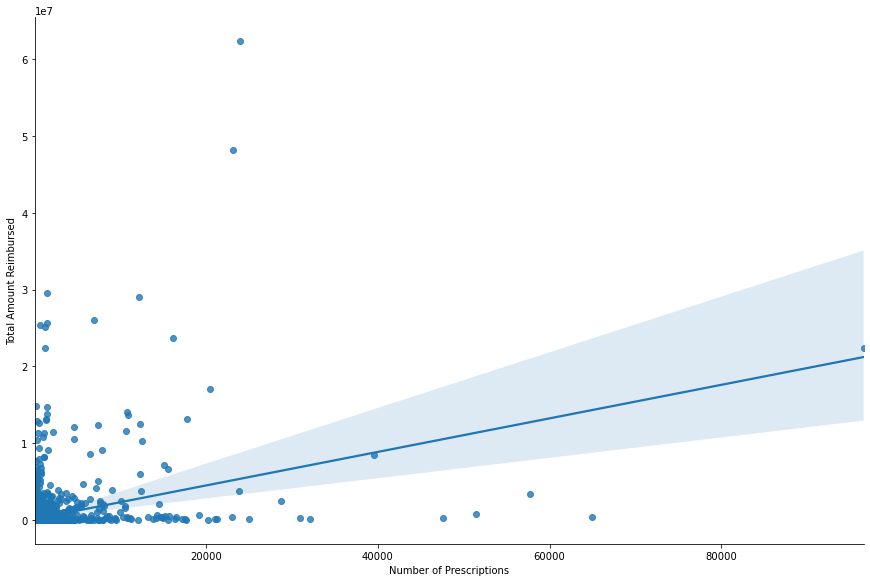

In [6]:
# raw vizualization 2016
data = cleaned_2016_data.iloc[:,[4, 5]]
sns.lmplot(x="Number of Prescriptions", y="Total Amount Reimbursed", data= data, height=8, aspect=1.5)


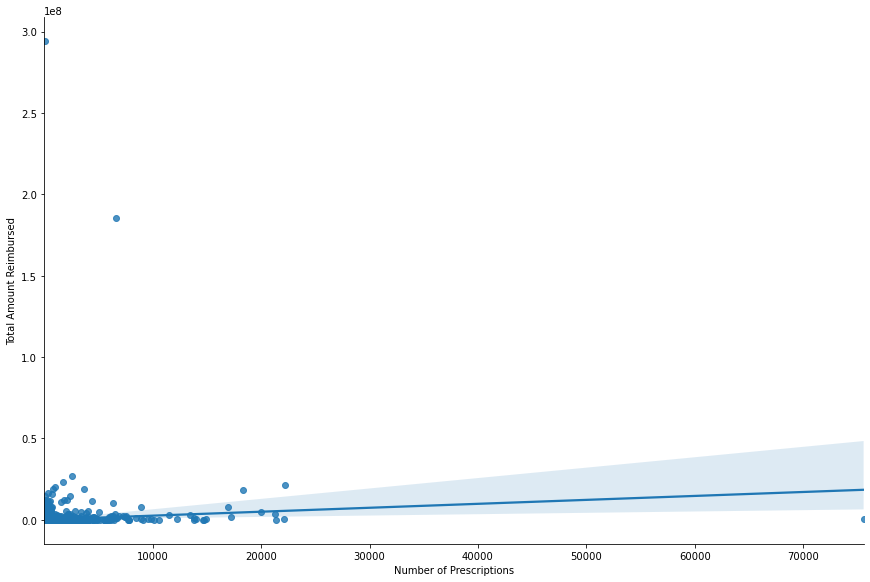

In [7]:
# raw vizualization 2017
data = cleaned_2017_data.iloc[:,[4, 5]]
sns.lmplot(x="Number of Prescriptions", y="Total Amount Reimbursed", data= data, height=8, aspect=1.5)

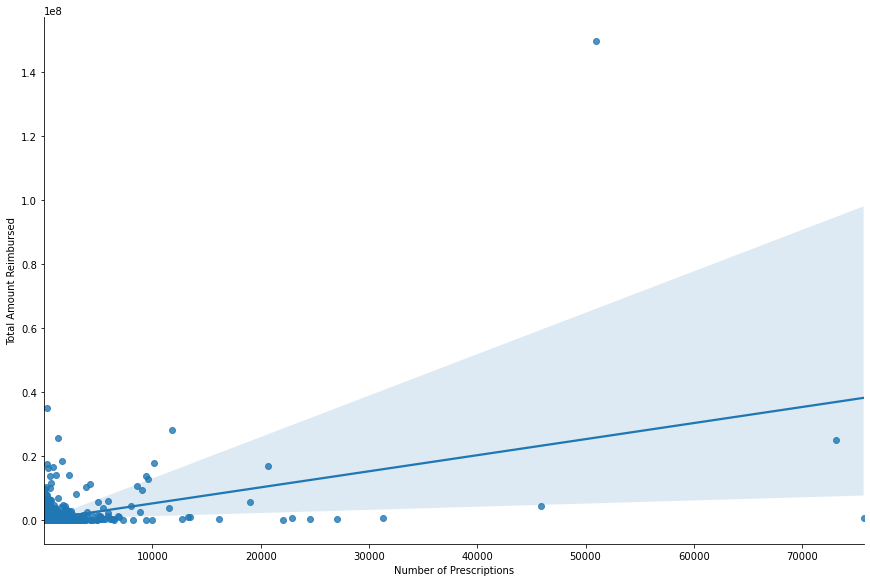

In [8]:
# raw vizualization 2018
data = cleaned_2018_data.iloc[:,[4, 5]]
sns.lmplot(x="Number of Prescriptions", y="Total Amount Reimbursed", data= data, height=8, aspect=1.5)

<AxesSubplot:xlabel='Normalised Prescriptions 2016', ylabel='Normalised Reimbursed Amount 2016'>

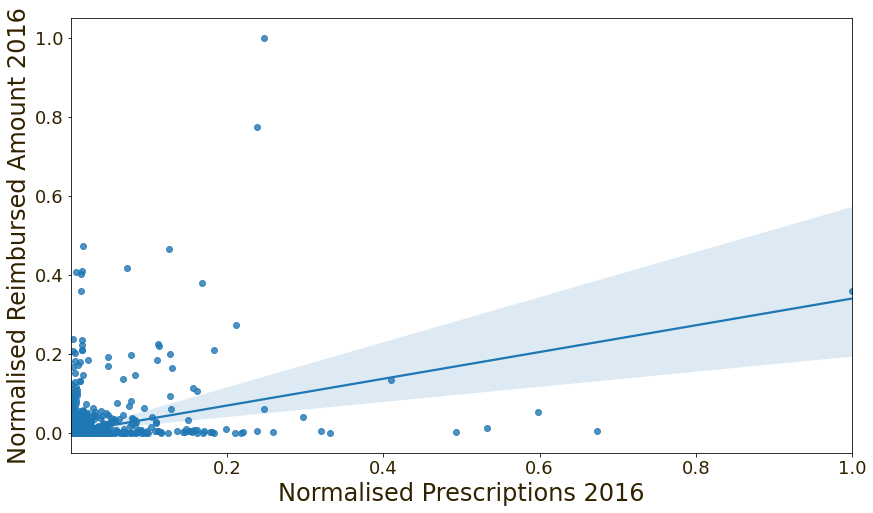

In [9]:
# Normalising raw data 2016

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2016", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2016", fontsize=24, color="#322300")
sns.regplot(x=normalised_cleaned_data_2016_prescriptions, y=normalised_cleaned_data_2016_reimbursement)

<AxesSubplot:xlabel='Normalised Prescriptions 2017', ylabel='Normalised Reimbursed Amount 2017'>

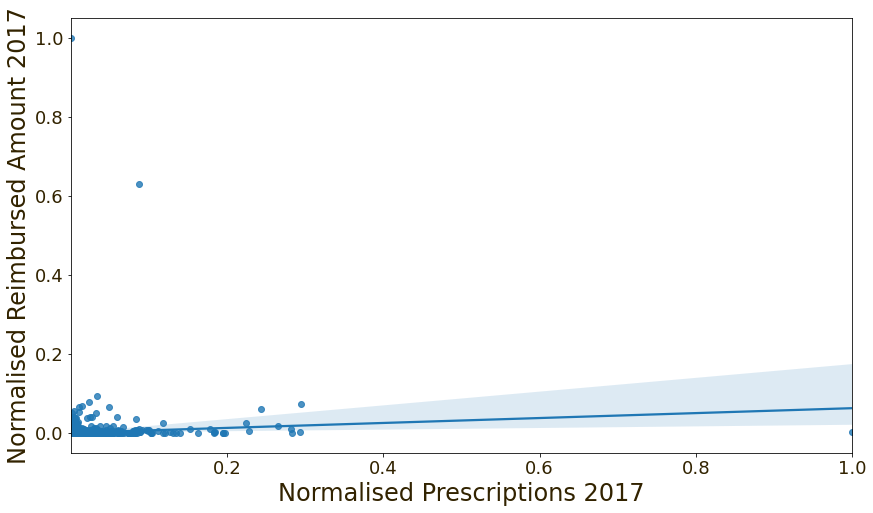

In [10]:
# Normalising raw data 2017

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2017", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2017", fontsize=24, color="#322300")
sns.regplot(x=normalised_cleaned_data_2017_prescriptions, y=normalised_cleaned_data_2017_reimbursement)

<AxesSubplot:xlabel='Normalised Prescriptions 2018', ylabel='Normalised Reimbursed Amount 2018'>

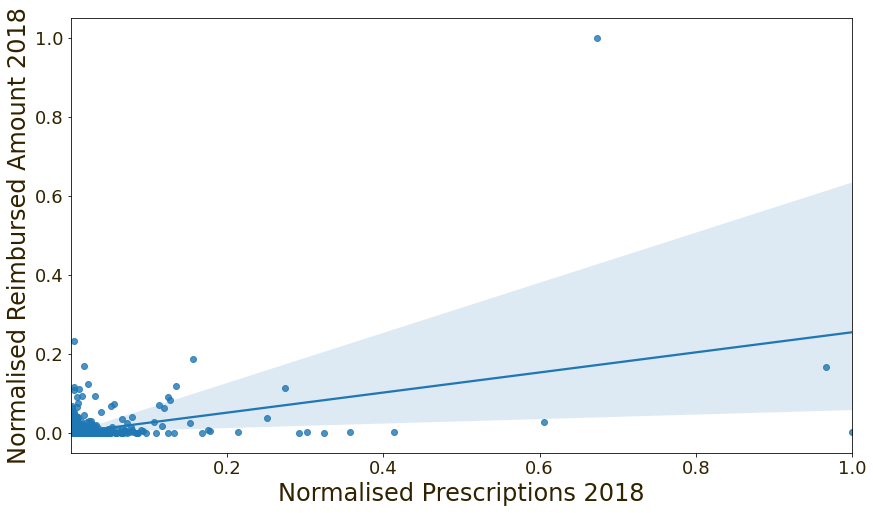

In [11]:
# Normalising raw data 2018

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2018", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2018", fontsize=24, color="#322300")
sns.regplot(x=normalised_cleaned_data_2018_prescriptions, y=normalised_cleaned_data_2018_reimbursement)

<AxesSubplot:xlabel='Normalised Prescriptions 2016', ylabel='Normalised Reimbursed Amount 2016'>

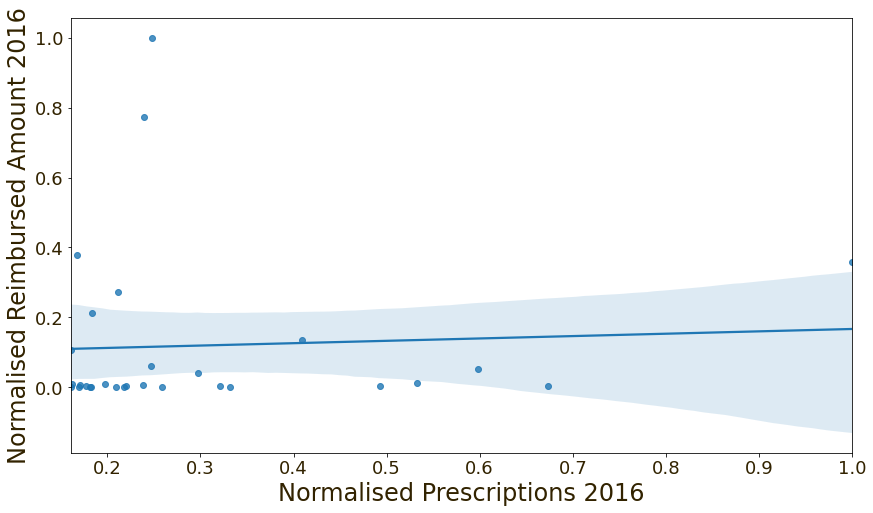

In [12]:
# Normalising data sorted by prescription 2016

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2016", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2016", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2016_pres, y=normalised_sortby_prescriptions_2016_reim)

<AxesSubplot:xlabel='Normalised Prescriptions 2017', ylabel='Normalised Reimbursed Amount 2017'>

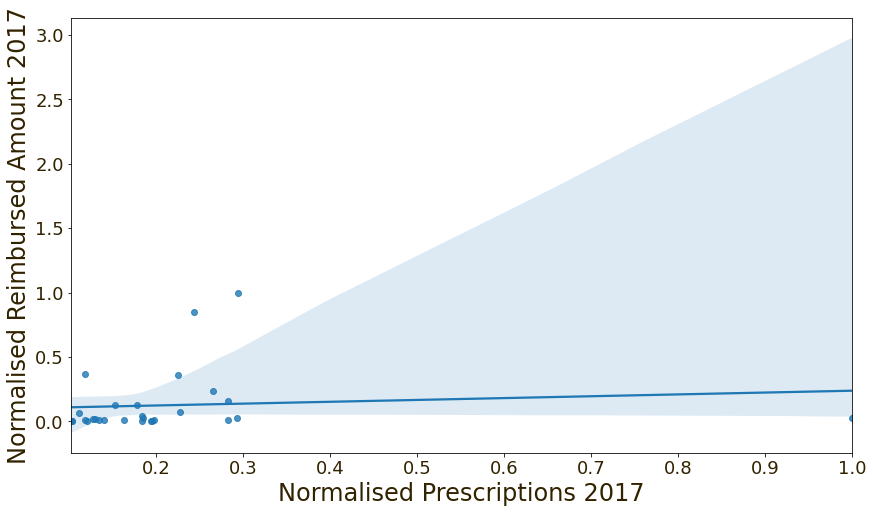

In [13]:
# Normalising data sorted by prescription 2017

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2017", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2017", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2017_pres, y=normalised_sortby_prescriptions_2017_reim)

<AxesSubplot:xlabel='Normalised Prescriptions 2018', ylabel='Normalised Reimbursed Amount 2018'>

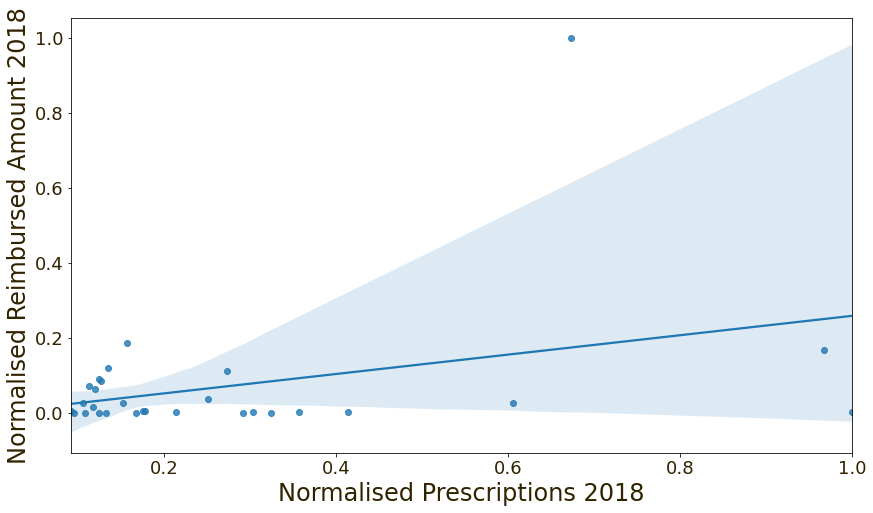

In [14]:
# Normalising data sorted by prescription 2018

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2018", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2018", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2018_pres, y=normalised_sortby_prescriptions_2018_reim)

<AxesSubplot:xlabel='Normalised Prescriptions 2016', ylabel='Normalised Reimbursed Amount 2016'>

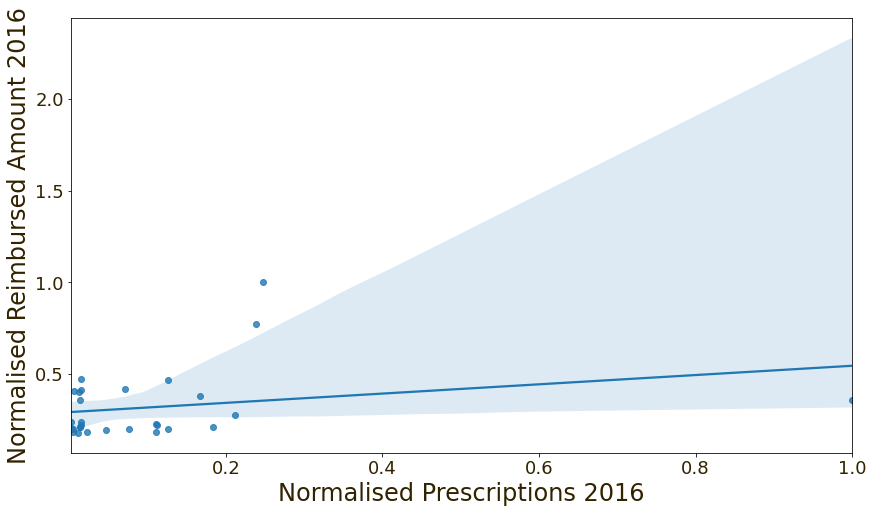

In [15]:
# Normalising data sorted by reimbursement 2016

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2016", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2016", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2016_pres, y=normalised_sortby_reimbursement_2016_reim)

<AxesSubplot:xlabel='Normalised Prescriptions 2017', ylabel='Normalised Reimbursed Amount 2017'>

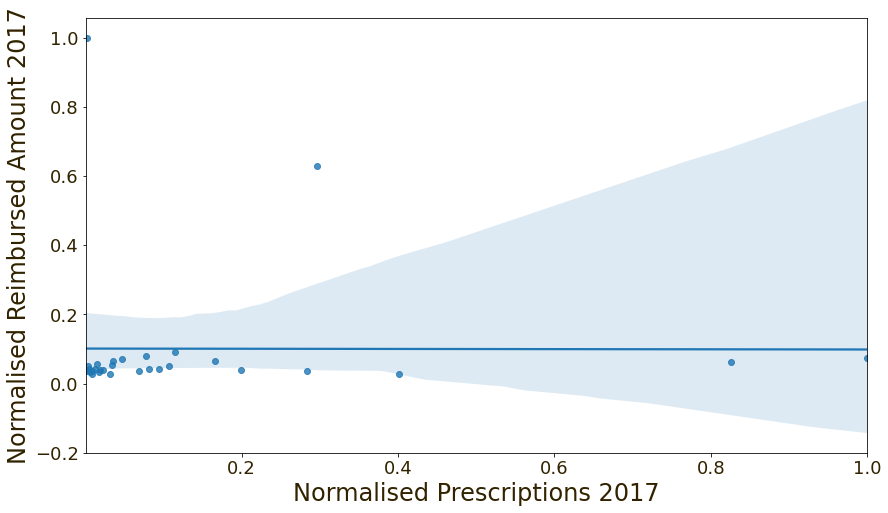

In [16]:
# Normalising data sorted by reimbursement 2017

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2017", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2017", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2017_pres, y=normalised_sortby_reimbursement_2017_reim)

<AxesSubplot:xlabel='Normalised Prescriptions 2018', ylabel='Normalised Reimbursed Amount 2018'>

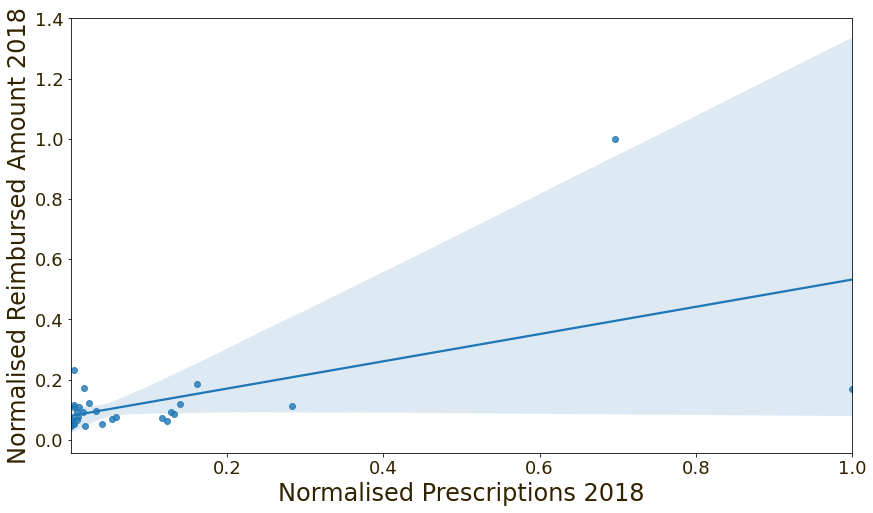

In [17]:
# Normalising data sorted by reimbursement 2018

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2018", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2018", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2018_pres, y=normalised_sortby_reimbursement_2018_reim)

<AxesSubplot:xlabel='Normalised Prescriptions 2016', ylabel='Normalised Reimbursed Amount 2016'>

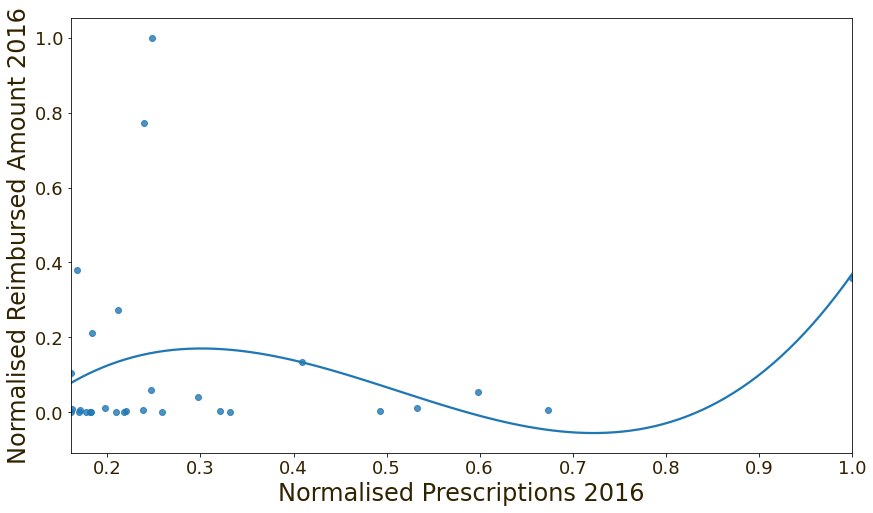

In [18]:
# Normalising data sorted by prescription 2016 polynomial order 3

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2016", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2016", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2016_pres, y=normalised_sortby_prescriptions_2016_reim, order=3, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2017', ylabel='Normalised Reimbursed Amount 2017'>

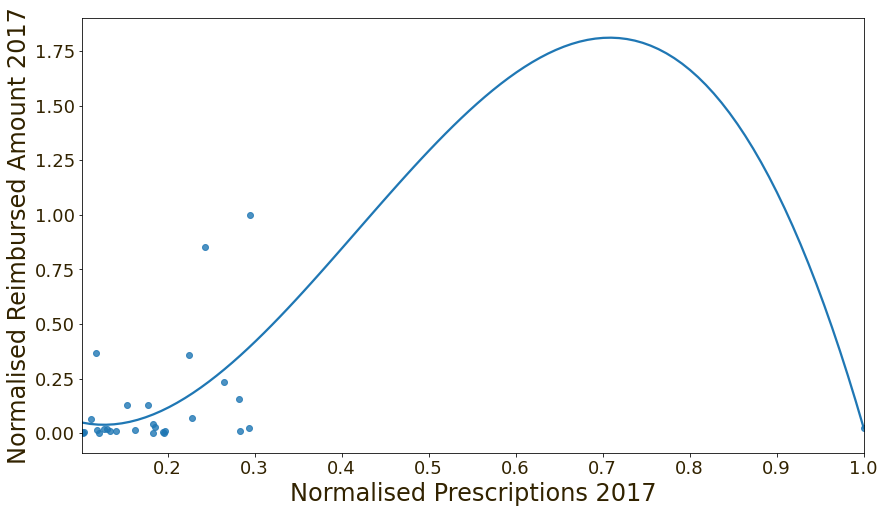

In [19]:
# Normalising data sorted by prescription 2017 polynomial order 3

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2017", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2017", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2017_pres, y=normalised_sortby_prescriptions_2017_reim, order=3, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2018', ylabel='Normalised Reimbursed Amount 2018'>

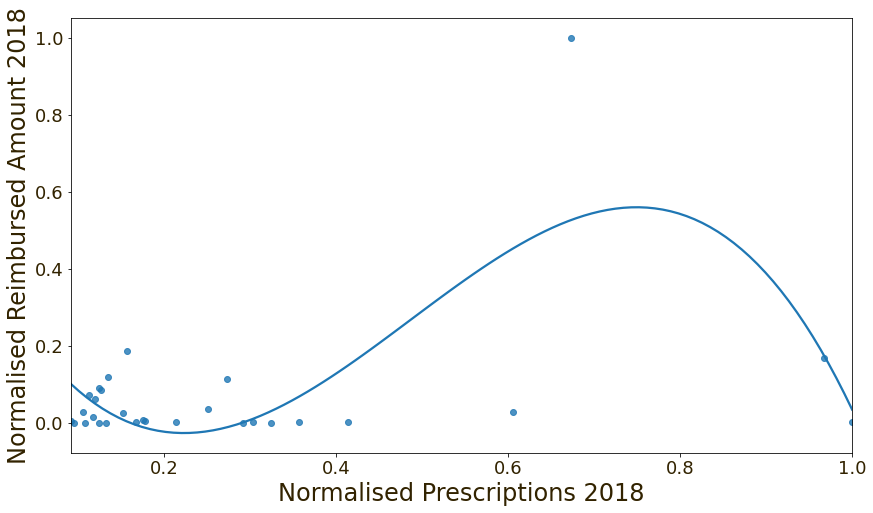

In [20]:
# Normalising data sorted by prescription 2018 polynomial order 3

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2018", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2018", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2018_pres, y=normalised_sortby_prescriptions_2018_reim, order=3, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2016', ylabel='Normalised Reimbursed Amount 2016'>

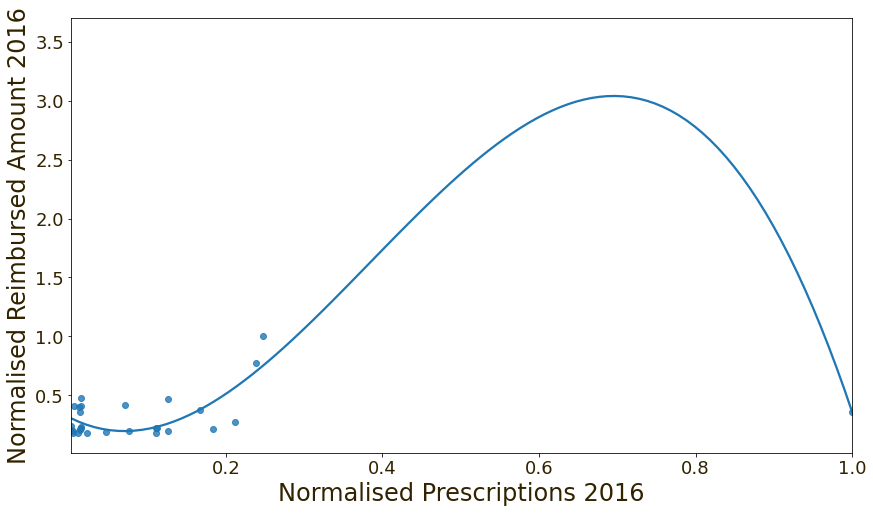

In [21]:
# Normalising data sorted by reimbursement 2016 polynomial order 3

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2016", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2016", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2016_pres, y=normalised_sortby_reimbursement_2016_reim, order=3, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2017', ylabel='Normalised Reimbursed Amount 2017'>

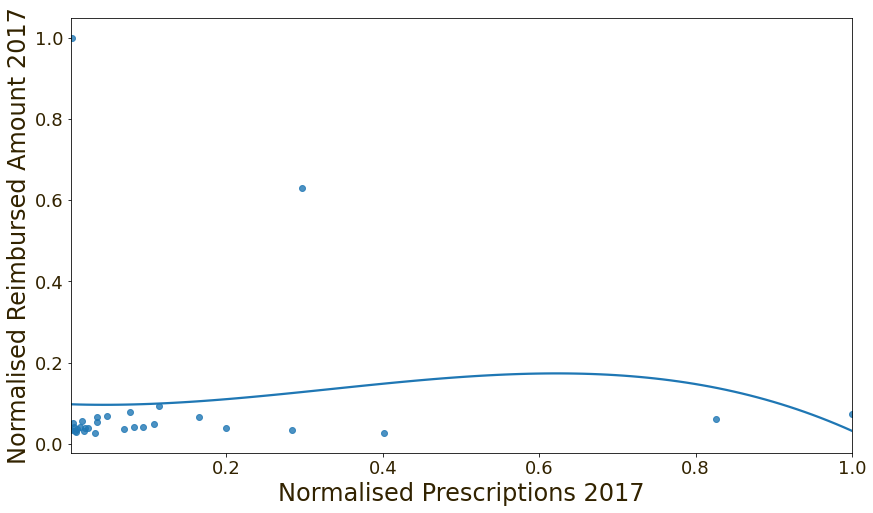

In [22]:
# Normalising data sorted by reimbursement 2017 polynomial order 3

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2017", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2017", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2017_pres, y=normalised_sortby_reimbursement_2017_reim, order=3, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2018', ylabel='Normalised Reimbursed Amount 2018'>

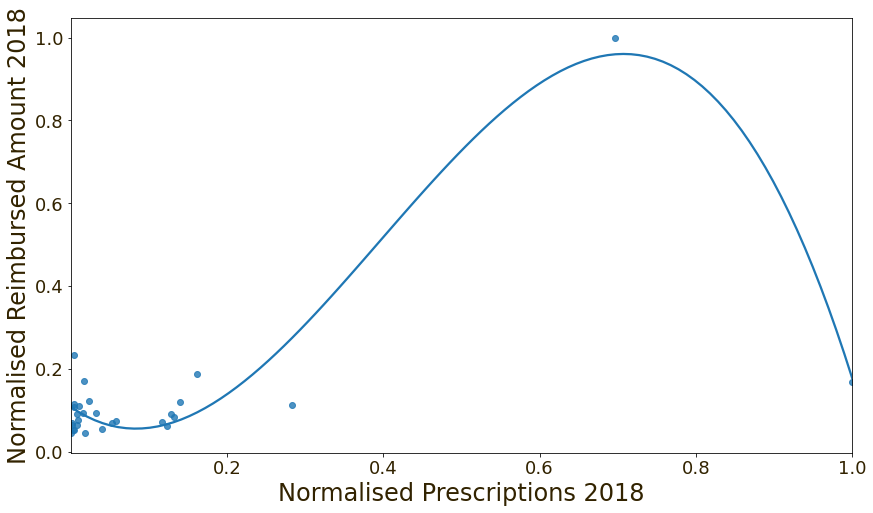

In [23]:
# Normalising data sorted by reimbursement 2018 polynomial order 3

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2018", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2018", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2018_pres, y=normalised_sortby_reimbursement_2018_reim, order=3, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2016', ylabel='Normalised Reimbursed Amount 2016'>

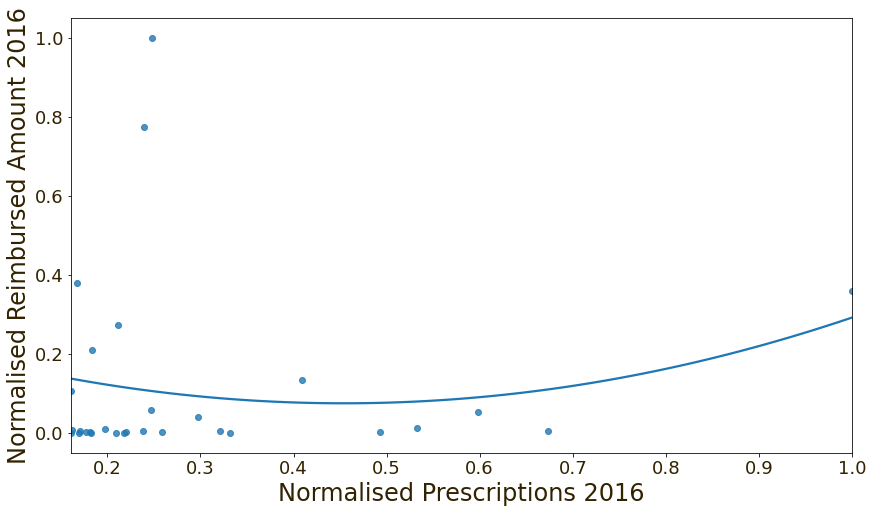

In [24]:
# Normalising data sorted by prescription 2016 polynomial order 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2016", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2016", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2016_pres, y=normalised_sortby_prescriptions_2016_reim, order=2, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2017', ylabel='Normalised Reimbursed Amount 2017'>

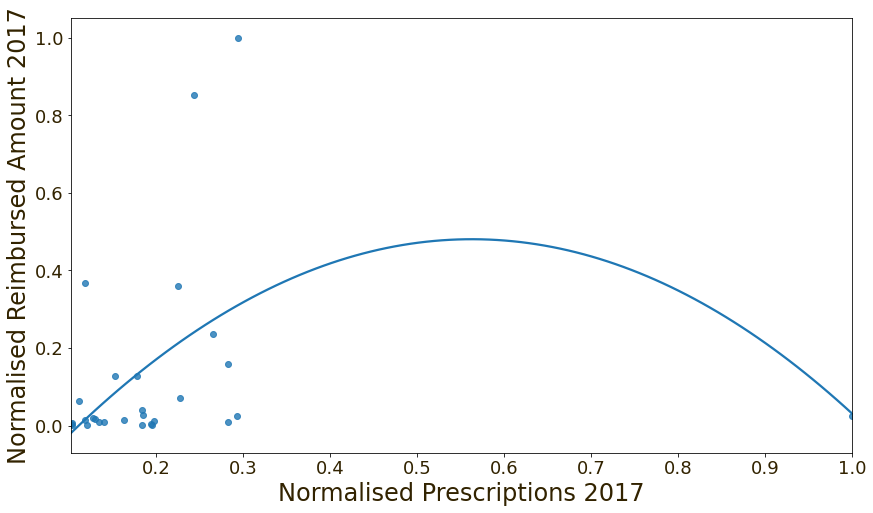

In [25]:
# Normalising data sorted by prescription 2017 polynomial order 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2017", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2017", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2017_pres, y=normalised_sortby_prescriptions_2017_reim, order=2, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2018', ylabel='Normalised Reimbursed Amount 2018'>

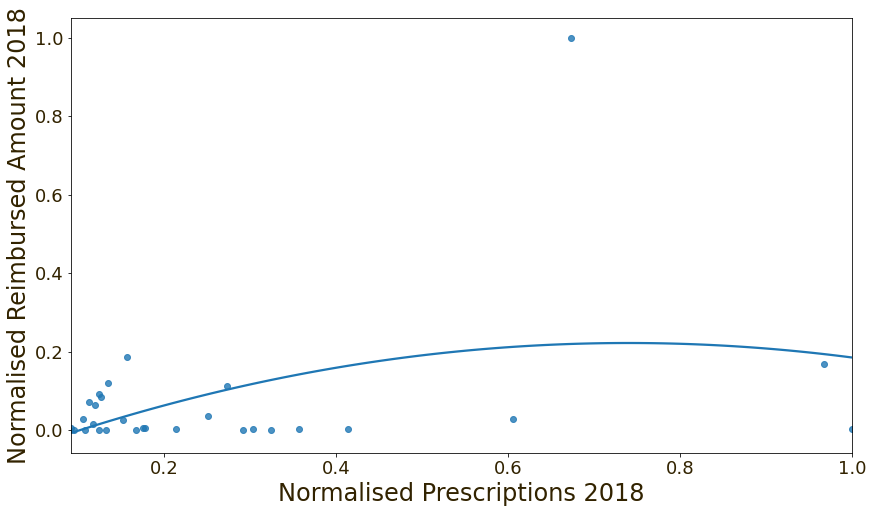

In [26]:
# Normalising data sorted by prescription 2018 polynomial order 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2018", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2018", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_prescriptions_2018_pres, y=normalised_sortby_prescriptions_2018_reim, order=2, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2016', ylabel='Normalised Reimbursed Amount 2016'>

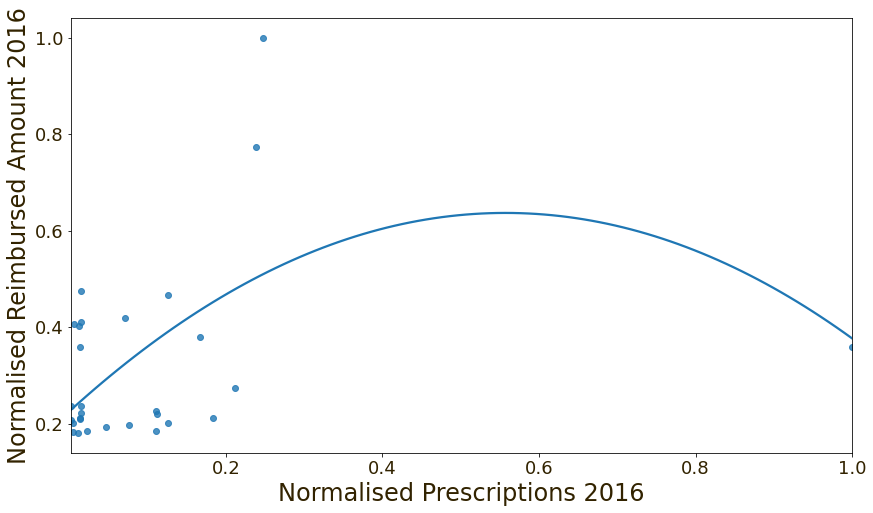

In [27]:
# Normalising data sorted by reimbursement 2016 polynomial order 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2016", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2016", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2016_pres, y=normalised_sortby_reimbursement_2016_reim, order=2, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2017', ylabel='Normalised Reimbursed Amount 2017'>

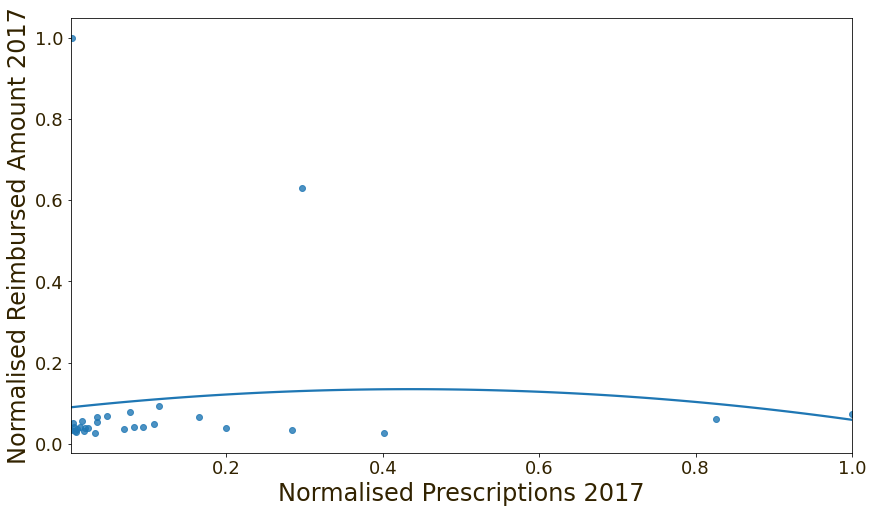

In [28]:
# Normalising data sorted by reimbursement 2017 polynomial order 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2017", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2017", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2017_pres, y=normalised_sortby_reimbursement_2017_reim, order=2, ci=False)

<AxesSubplot:xlabel='Normalised Prescriptions 2018', ylabel='Normalised Reimbursed Amount 2018'>

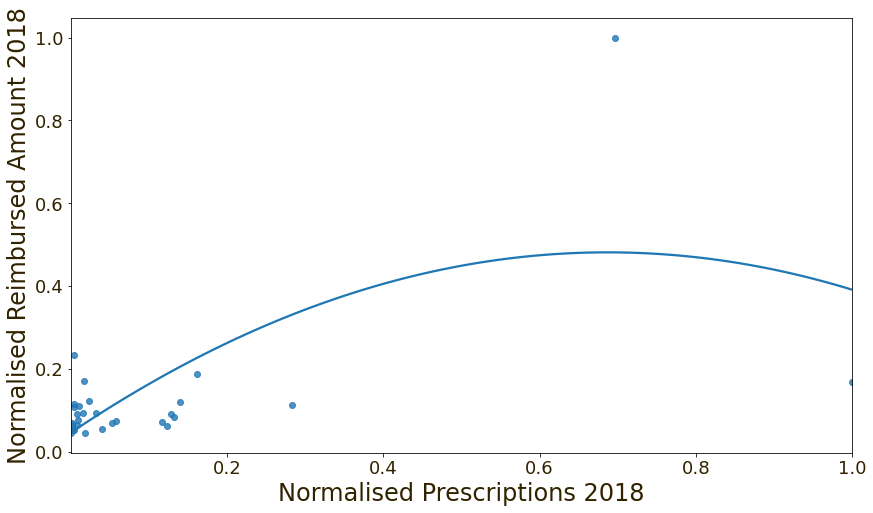

In [29]:
# Normalising data sorted by reimbursement 2018 polynomial order 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Normalised Prescriptions 2018", fontsize=24, color="#322300")
ax.set_ylabel("Normalised Reimbursed Amount 2018", fontsize=24, color="#322300")
sns.regplot(x=normalised_sortby_reimbursement_2018_pres, y=normalised_sortby_reimbursement_2018_reim, order=2, ci=False)

In [30]:
#--> After visualizing data for all three years with different conditions I have come to following conclusions

#0#  Polynomial regression is better for the dataset that we are using and highly likely in the actual dataset

#0#  The inital assumption was that as the number of prescription increases so will the reimbursed ammount which
###  seemed to be supported by the linear regression model but when we used the polynomial regression it is more
###  clear that usually the trend is that the least prescribed medicines have lower total reimbursement and it
###  keeps on rising until some point after which the medicines with higher number of prescriptuon seem to also
###  have lower  total reimbursement in average case.

#0#  This could be because the most prescribed medecines very common and are usually very cheap and least prescribed
###  drugs are mostlu controlled drugs whic are very expensive and are maintained and administered very carefully
###  but we can not be sure with this statement as we do not have a price data for individual medicine which in real
###  data we will have.

#0#  With the result from this assignment and after further reserach along with new data there seems to be possibility
###  and opportunity for machine learning to be implemented with the use of advanced algorithms.